In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
from scipy import stats

## Задача 1

### Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
### и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]
### Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат. Является ли значимым получившееся уравнение регрессии?

In [2]:
x = np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214], [-0.18757272, 1.30337355, 5.12093014, 3.46363202], [-0.81094525, 1.82463398, 5.79686488, 1.86159445], [ 0.75129018, 2.67392052, 3.65529809, 1.66746094], [ 0.00972362, 1.97367255, 2.50594319, 1.69755173], [-0.62972637, 0.77750764, 2.84124027, 4.54410559], [ 2.29536229, 1.81206697, 1.95026215, 1.51874636], [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203], [ 2.39252799, 3.17563985, 3.61420599, 5.10773362], [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])
y = np.array([9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108, 7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

In [3]:
xt = x.transpose()
xt.shape

(4, 10)

In [4]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

In [5]:
# метод наимньших квадратов

def lsm(x, y):
    ones = np.ones((x.shape[0], 1))
    x2 = np.hstack((ones, x))
    XTX = x2.T.dot(x2)
    np.linalg.det(XTX)
    XTX_inv = np.linalg.inv(XTX)
    b = XTX_inv.dot(x2.T).dot(y)
    z = x2.dot(b)
    e = y - z
    R = 1 - sum_of_squares(e) / sum_of_squares(y)
    return R

In [6]:
# я не смогла втулить сюда combinations и перебрала варианты вручную

x1 = np.array([xt[0], xt[1]]).transpose()
x2 = np.array([xt[0], xt[2]]).transpose()
x3 = np.array([xt[0], xt[3]]).transpose()
x4 = np.array([xt[1], xt[2]]).transpose()
x5 = np.array([xt[1], xt[3]]).transpose()
x6 = np.array([xt[2], xt[3]]).transpose()

In [7]:
print ('1 и 2 столбцы дают коэффициент детерминации', lsm(x1, y),
      '\n1 и 3 столбцы дают коэффициент детерминации', lsm(x2, y),
      '\n1 и 4 столбцы дают коэффициент детерминации', lsm(x3, y),
      '\n2 и 3 столбцы дают коэффициент детерминации', lsm(x4, y),
      '\n2 и 4 столбцы дают коэффициент детерминации', lsm(x5, y),
      '\n3 и 4 столбцы дают коэффициент детерминации', lsm(x6, y))

1 и 2 столбцы дают коэффициент детерминации 0.18113594742585215 
1 и 3 столбцы дают коэффициент детерминации 0.7634246238793152 
1 и 4 столбцы дают коэффициент детерминации 0.4532966783144078 
2 и 3 столбцы дают коэффициент детерминации 0.5479482734039011 
2 и 4 столбцы дают коэффициент детерминации 0.6062055761129932 
3 и 4 столбцы дают коэффициент детерминации 0.622441987650532


Самый высокий коэф детерминации для сочетания - столбцы 1 и 3

In [8]:
# значимость уровней регрессии

In [9]:
n = x2.shape[0]
m = x2.shape[1] - 1  # поскольку добавляли фиктивный столбец

k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

In [10]:
# критическая область

alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

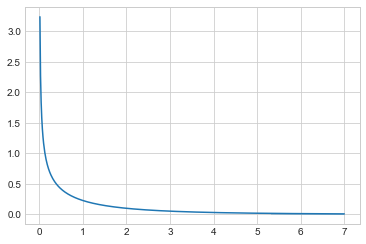

In [11]:
ox = np.linspace(0, 7, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 7, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

In [12]:
F = (lsm(x2, y)  / k1) / ((1 - lsm(x2, y)) / k2)
F

25.81586085239463

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

## Задача 2

### Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]

scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
### Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

### Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
### Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
### Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
### Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
### Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

In [13]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) #salary - фактор
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) # scoring - целевая переменная

In [14]:
# Найдём коэффициенты линейной регрессии:

b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)

b0, b1

(444.1773573243596, 2.620538882402765)

т.е. с увеличением ЗП на 1 у.е. скоринг увеличивается на 2,62 у.е.

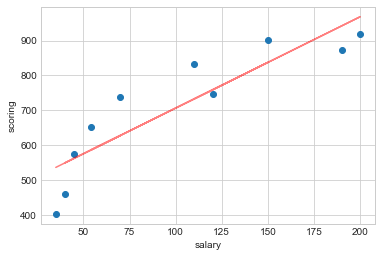

In [15]:
ox = x
oy = b0 + b1 * ox

plt.scatter(x, y)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring');

In [16]:
# коэффициенты линейной регрессии с помощью метода наименьших квадратов ----- матрица объект-признак???

In [17]:
# коэффициент детерминации

z = b0 + b1 * x
e = y - z
R1 = 1 - sum_of_squares(e) / sum_of_squares(y)
R1

0.7876386635293686

Коэффициент детерминации, равный $0.7876$, означает, что $79 \%$ дисперсии переменной $y$ _учитывается_ или _объясняется_ моделью. Оставшиеся $21 \%$ обусловлены какими-то ещё факторами, которые при построении модели не учитывались.

In [18]:
# теперь метод наименьших квадратов. Для этого нужно преобразовать массив с ЗП

x_ = x.reshape(len(x), -1)

In [19]:
lsm(x_, y)

0.7876386635293686

значения совпали

In [20]:
# значимость регрессии F-тест Фишера

n = x.shape[0]
m = 1

k1 = m
k2 = n - m - 1
alpha = 0.05                             # уровень значимости
t = stats.f.ppf(1 - alpha, k1, k2)

k1, k2, t

(1, 8, 5.317655071578714)

Итак, критическая область:
$$\Omega_\alpha = \left( 5.32, \infty \right)$$

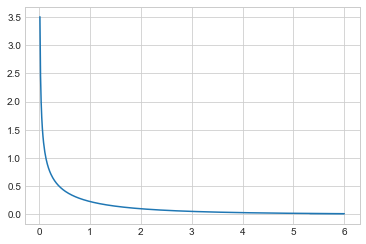

In [21]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

In [22]:
# Считаем значение статистики:

F = (R1 / k1) / ((1 - R1) / k2)
F

29.67164085966451

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

In [23]:
# Построим для коэффициента наклона доверительный интервал.

def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [24]:
s_slope = standard_error_slope(x, y, z)
s_slope

0.48108279568516005

In [25]:
alpha = 0.05
n = x.shape[0]

t1 = stats.t.ppf(alpha / 2, df=n - 2)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 2)

t1, t2

(-2.306004135033371, 2.3060041350333704)

In [26]:
(b1 + t1 * s_slope, b1 + t2 * s_slope)

(1.5111599662593715, 3.729917798546158)

In [27]:
# Построим для коэффициента сдвига доверительный интервал.

def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [28]:
s_intercept = standard_error_intercept(x, y, z)
s_intercept

56.46649755068153

In [29]:
(b0 + t1 * s_intercept, b0 + t2 * s_intercept)

(313.9653804816363, 574.3893341670829)